In [11]:
import pandas as pd

filepath = 'steam_reviews_constructiveness.csv'

data = pd.read_csv(filepath)

,id,game,review,author_playtime_at_review,voted_up,votes_up,votes_funny,constructive
0,1,Among Us,This game can suck my balls before I play it a...,6,False,1,0,0
1,2,Among Us,Very fun little party game! Even better with f...,11,True,0,0,1
2,3,Among Us,if you're lonely don't bother but if you're no...,40,True,2,1,0
3,4,Among Us,fun and anoyying,80,True,0,0,0
4,5,Among Us,when impostor is sus...,51,True,0,0,0


In [12]:
data.duplicated().sum()

0

### 1. Descriptive Statistics

In [10]:
data.describe()

,id,author_playtime_at_review,votes_up,votes_funny,constructive
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,731.000000,261.253936,0.706366,0.273101,0.369610
std,421.898685,517.550995,4.283053,2.461210,0.482864
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,366.000000,17.000000,0.000000,0.000000,0.000000
50%,731.000000,71.000000,0.000000,0.000000,0.000000
75%,1096.000000,258.000000,1.000000,0.000000,1.000000
max,1461.000000,4936.000000,104.000000,76.000000,1.000000


### 2. Distribution Analysis

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


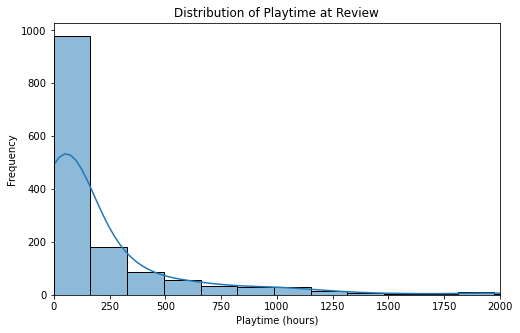

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


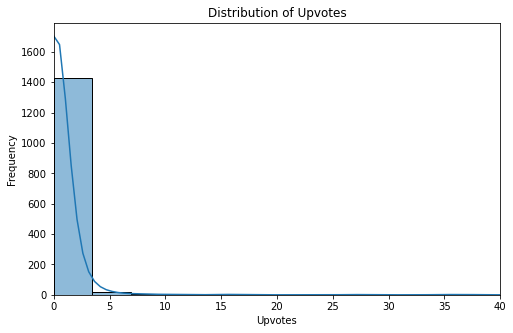

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


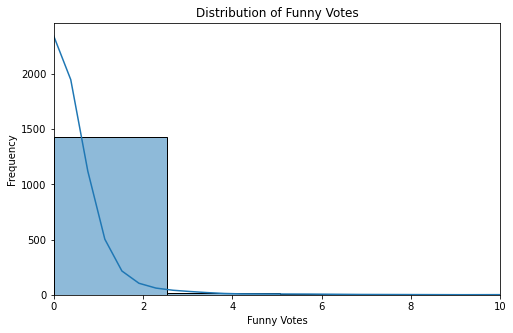

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for playtime
plt.figure(figsize=(8, 5))
sns.histplot(data['author_playtime_at_review'], bins=30, kde=True)
plt.title('Distribution of Playtime at Review')
plt.xlabel('Playtime (hours)')
plt.ylabel('Frequency')
plt.xlim(0, 2000)
plt.show()

# Histogram for votes_up
plt.figure(figsize=(8, 5))
sns.histplot(data['votes_up'], bins=30, kde=True)
plt.title('Distribution of Upvotes')
plt.xlabel('Upvotes')
plt.ylabel('Frequency')
plt.xlim(0, 40)
plt.show()

# Histogram for votes_funny
plt.figure(figsize=(8, 5))
sns.histplot(data['votes_funny'], bins=30, kde=True)
plt.title('Distribution of Funny Votes')
plt.xlabel('Funny Votes')
plt.ylabel('Frequency')
plt.xlim(0, 10)
plt.show()

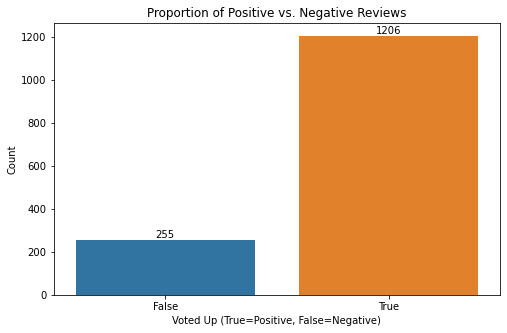

In [26]:
# Bar plot for voted_up
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='voted_up', data=data)
plt.title('Proportion of Positive vs. Negative Reviews')
plt.xlabel('Voted Up (True=Positive, False=Negative)')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10)


### 3. Correlation Analysis

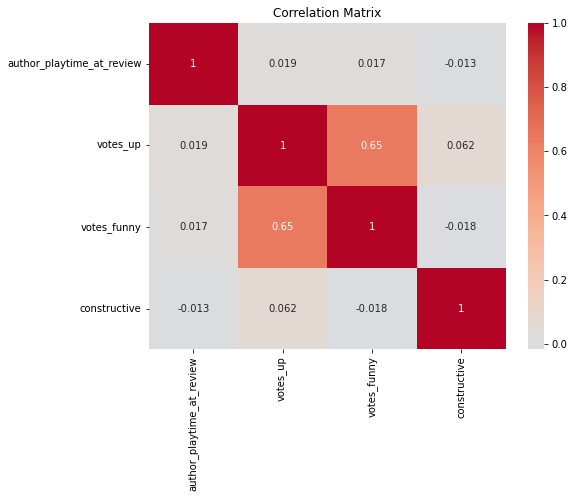

In [27]:
correlation_matrix = data[['author_playtime_at_review', 'votes_up', 'votes_funny', 'constructive']].corr()

# Heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


### 4. Visualization of Relationships

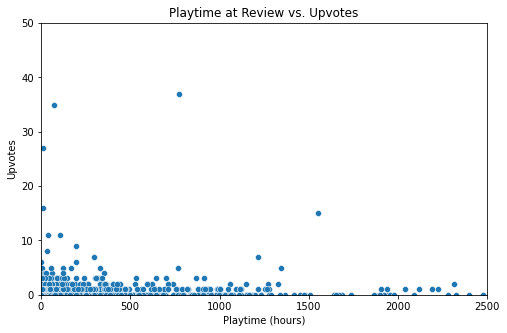

In [35]:
# Scatter plot of playtime vs. upvotes
plt.figure(figsize=(8, 5))
sns.scatterplot(x='author_playtime_at_review', y='votes_up', data=data)
plt.title('Playtime at Review vs. Upvotes')
plt.xlabel('Playtime (hours)')
plt.ylabel('Upvotes')
plt.xlim(0, 2500)
plt.ylim(0, 50)
plt.show()

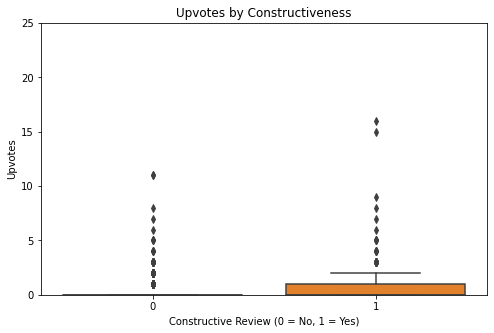

In [39]:
# Box plot for votes_up based on constructive reviews
plt.figure(figsize=(8, 5))
sns.boxplot(x='constructive', y='votes_up', data=data)
plt.title('Upvotes by Constructiveness')
plt.xlabel('Constructive Review (0 = No, 1 = Yes)')
plt.ylabel('Upvotes')
plt.ylim(0, 25)
plt.show()


### 4. Feature Engineering
Feature engineering involves creating new features based on existing data that could improve our understanding or predictive capabilities.


In [42]:
# Categorizing playtime
conditions = [
    (data['author_playtime_at_review'] <= 10),
    (data['author_playtime_at_review'] > 10) & (data['author_playtime_at_review'] <= 50),
    (data['author_playtime_at_review'] > 50)
]
labels = ['Low Playtime', 'Medium Playtime', 'High Playtime']
data['playtime_category'] = pd.cut(data['author_playtime_at_review'], 
                                           bins=[0, 10, 50, data['author_playtime_at_review'].max()],
                                           labels=labels, right=False)

data.head()

,id,game,review,author_playtime_at_review,voted_up,votes_up,votes_funny,constructive,playtime_category
0,1,Among Us,This game can suck my balls before I play it a...,6,False,1,0,0,Low Playtime
1,2,Among Us,Very fun little party game! Even better with f...,11,True,0,0,1,Medium Playtime
2,3,Among Us,if you're lonely don't bother but if you're no...,40,True,2,1,0,Medium Playtime
3,4,Among Us,fun and anoyying,80,True,0,0,0,High Playtime
4,5,Among Us,when impostor is sus...,51,True,0,0,0,High Playtime


In [45]:
# Create total_votes feature
data['total_votes'] = data['votes_up'] + data['votes_funny']
data.head()

,id,game,review,author_playtime_at_review,voted_up,votes_up,votes_funny,constructive,playtime_category,total_votes
0,1,Among Us,This game can suck my balls before I play it a...,6,False,1,0,0,Low Playtime,1
1,2,Among Us,Very fun little party game! Even better with f...,11,True,0,0,1,Medium Playtime,0
2,3,Among Us,if you're lonely don't bother but if you're no...,40,True,2,1,0,Medium Playtime,3
3,4,Among Us,fun and anoyying,80,True,0,0,0,High Playtime,0
4,5,Among Us,when impostor is sus...,51,True,0,0,0,High Playtime,0


In [47]:
# Length of review text
data['review_length'] = data['review'].apply(len)
data.head()

,id,game,review,author_playtime_at_review,voted_up,votes_up,votes_funny,constructive,playtime_category,total_votes,review_length
0,1,Among Us,This game can suck my balls before I play it a...,6,False,1,0,0,Low Playtime,1,92
1,2,Among Us,Very fun little party game! Even better with f...,11,True,0,0,1,Medium Playtime,0,99
2,3,Among Us,if you're lonely don't bother but if you're no...,40,True,2,1,0,Medium Playtime,3,98
3,4,Among Us,fun and anoyying,80,True,0,0,0,High Playtime,0,16
4,5,Among Us,when impostor is sus...,51,True,0,0,0,High Playtime,0,23


## 5. Sensitivity Analysis

Sensitivity analysis involves understanding how the variation in different features impacts the outcome

We'll use a simple model like a decision tree or random forest to understand feature importance.



                           importance
review_length                0.606938
author_playtime_at_review    0.292790
votes_up                     0.047774
votes_funny                  0.032795
playtime_category_encoded    0.019704


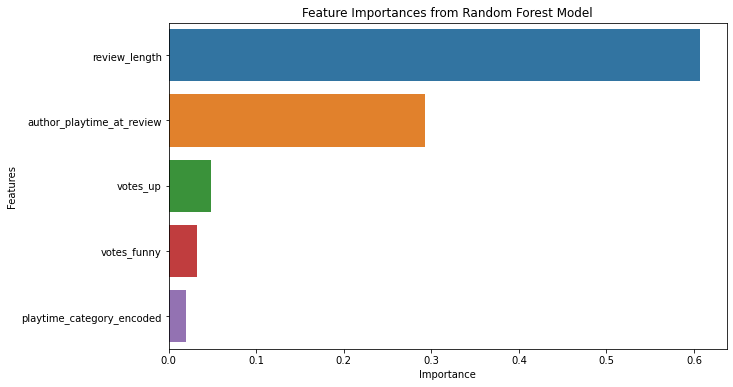

In [56]:
# Variable Importance

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['playtime_category_encoded'] = label_encoder.fit_transform(data['playtime_category'].astype(str))

X = data[['author_playtime_at_review', 'votes_up', 'votes_funny', 'review_length', 'playtime_category_encoded']]
y = data['constructive']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

feature_importances = pd.DataFrame(rf_model.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

# Visualize Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances['importance'], y=feature_importances.index)
plt.title('Feature Importances from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [55]:
# Scenario Analysis
# Example scenario analysis

# Create a DataFrame for different scenarios
scenarios = pd.DataFrame({
    'playtime': [10, 20, 50, 80],
    'votes_up': [0, 5, 10, 15]
})

# Predict constructiveness for different scenarios
for index, row in scenarios.iterrows():
    test_row = pd.DataFrame({
        'author_playtime_at_review': [row['playtime']],
        'votes_up': [row['votes_up']],
        'votes_funny': [0],  # assuming no funny votes for simplicity
        'review_length': [50],  # average review length
        'playtime_category_encoded': [label_encoder.transform(['Low Playtime'])[0]]  # encoding
    })

    prediction = rf_model.predict(test_row)
    scenarios.loc[index, 'prediction'] = prediction[0]

print(scenarios)

   playtime  votes_up  prediction
0        10         0         0.0
1        20         5         1.0
2        50        10         1.0
3        80        15         1.0


## 6. Sentiment Analysis of Reviews

Additionally, we can perform a sentiment analysis on the reviews themselves. We can use libraries like TextBlob or VADER to determine the sentiment of each review.

In [58]:
from textblob import TextBlob

def get_sentiment(review):
    analysis = TextBlob(review)
    return analysis.sentiment.polarity  # Returns a value between -1 (negative) and 1 (positive)

data['sentiment'] = data['review'].apply(get_sentiment)
print(data[['review', 'sentiment']].head())


                                              review  sentiment
0  This game can suck my balls before I play it a...    -0.5000
1  Very fun little party game! Even better with f...    -0.0345
2  if you're lonely don't bother but if you're no...     0.3000
3                                   fun and anoyying     0.3000
4                            when impostor is sus...     0.0000


c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


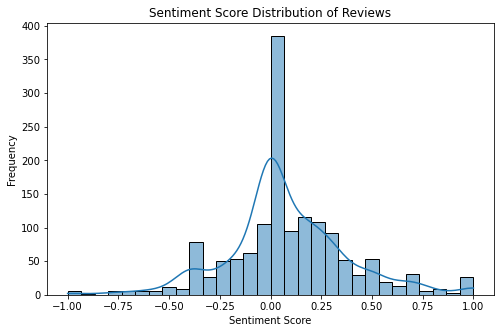

In [59]:
# Histogram of sentiment scores
plt.figure(figsize=(8, 5))
sns.histplot(data['sentiment'], bins=30, kde=True)
plt.title('Sentiment Score Distribution of Reviews')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


In [60]:
# Group the Data by Game

game_sentiment = data.groupby('game')['sentiment'].mean().reset_index()
game_sentiment.columns = ['game', 'average_sentiment']
game_sentiment_sorted = game_sentiment.sort_values(by='average_sentiment', ascending=False)
print(game_sentiment_sorted)


                             game  average_sentiment
7                 Team Fortress 2           0.162216
8                        Terraria           0.151342
3                     Garry's Mod           0.105805
2                      ELDEN RING           0.084451
4              Grand Theft Auto V           0.073848
0                        Among Us           0.070441
6                            Rust           0.070098
1                Counter-Strike 2           0.069788
9  Tom Clancy's Rainbow Six Siege           0.035221
5             PUBG: BATTLEGROUNDS           0.000478


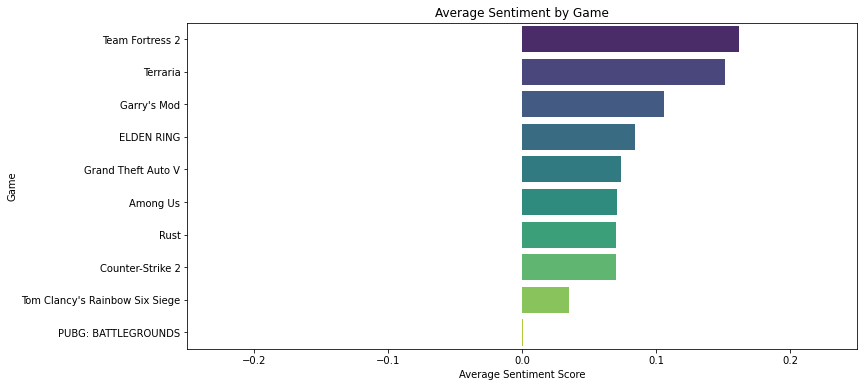

In [62]:
# Visualized Top Games with the Best sentiment
plt.figure(figsize=(12, 6))
sns.barplot(x='average_sentiment', y='game', data=game_sentiment_sorted, palette='viridis')
plt.title('Average Sentiment by Game')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Game')
plt.xlim(-.25, .25)
plt.show()
